In [ ]:
#Pruning

# **What is Pruning in Decision Trees?**

---



Pruning is a technique used in decision trees to remove parts of the tree that do not provide significant power in classifying instances. The primary goal of pruning is to reduce the complexity of the final model, thereby improving its generalization ability and reducing the risk of overfitting.

Why Pruning is Used in Decision Trees
Reduces Overfitting: Pruning helps in simplifying the model by removing nodes that add complexity without significant predictive power, thus improving the model's performance on unseen data.
Improves Generalization: By eliminating less important nodes, the decision tree becomes more general and robust to new data.
Increases Interpretability: A smaller tree is easier to interpret and understand.

Types of Pruning

1. Pre-Pruning (Early Stopping)
******************************************************************************
Pre-pruning involves halting the growth of the tree before it reaches full complexity. This is done by setting criteria that stop the tree from splitting further.

Advantages:
********************************************************************************
Faster tree generation.
Prevents overfitting from the start.
Where Used:

When computational efficiency is a concern.
In large datasets where deep trees are impractical.
Example Criteria:

Maximum depth of the tree.
Minimum number of samples required to split a node.
Minimum number of samples per leaf.

2. Post-Pruning (Pruning After Tree Construction)
*****************************************************************************
Post-pruning involves growing the full tree first and then removing nodes that do not provide significant power. This is done by evaluating the impact of removing nodes and deciding based on a cost-complexity trade-off.

Advantages:
********************************************************************************
More thorough as it evaluates the full tree.
Can lead to better generalization as the decision to prune is made after seeing the full complexity.
Where Used:

When accuracy is paramount.
When there is enough computational power to evaluate the full tree.
Example Techniques:

Cost complexity pruning (using a parameter like alpha in CART).
Reduced error pruning.

Applications
****************************************************************************
Classification and Regression Tasks: Pruning is widely used in both classification and regression problems to improve model performance.
Feature Selection: Pruning helps in identifying and removing less important features, thus aiding in feature selection.
Medical Diagnosis, Credit Scoring, and Customer Segmentation: Any application where interpretability and generalization are critical.
Example Decision Tree with Pre-Pruning and Post-Pruning
We'll use a dataset from sklearn, the famous Iris dataset, and demonstrate pre-pruning and post-pruning with decision trees using Python.

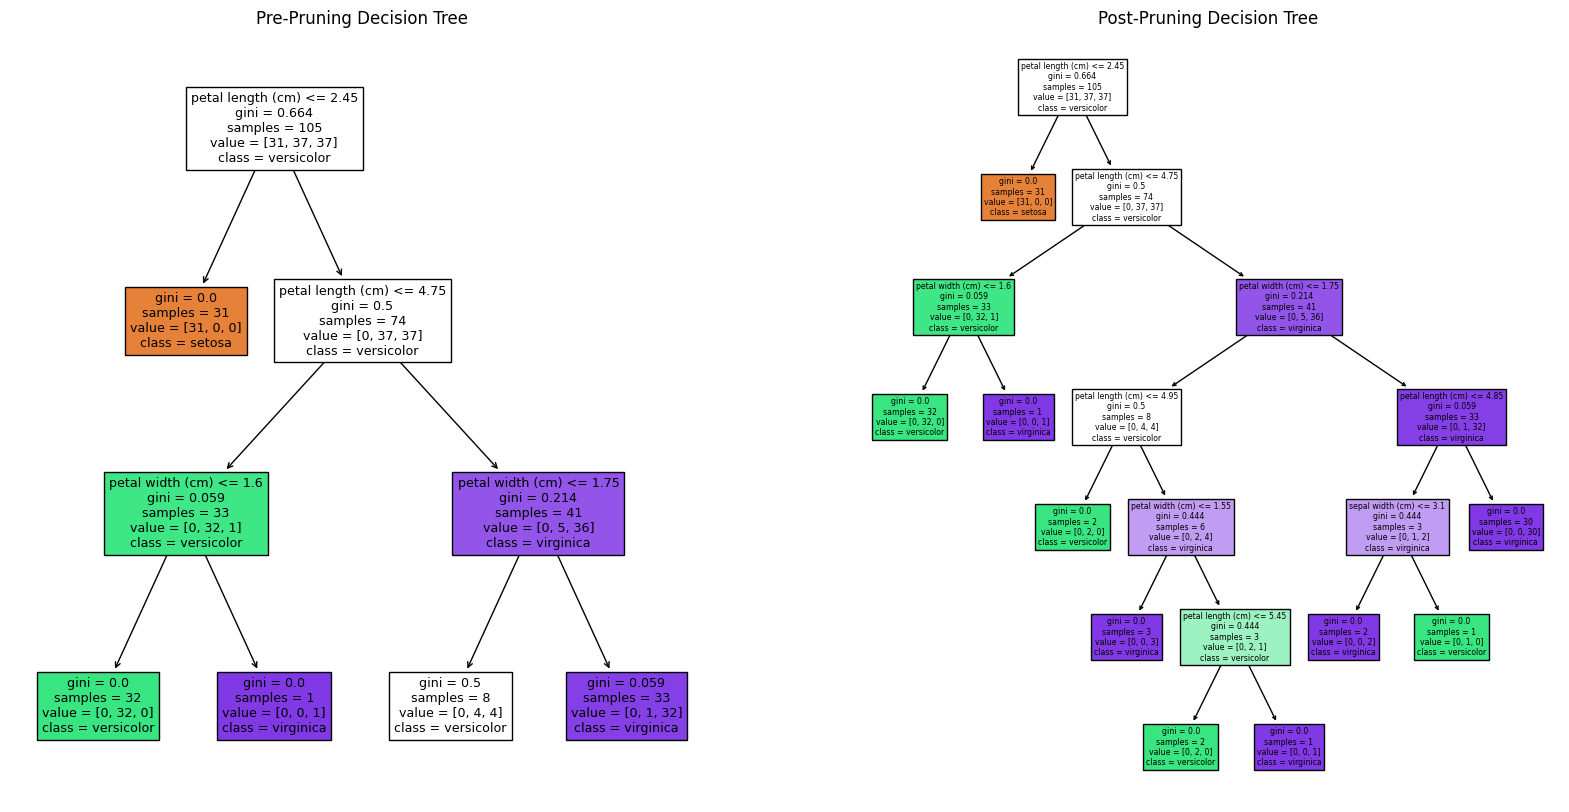

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pre-Pruning
pre_pruning_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
pre_pruning_clf.fit(X_train, y_train)

# Post-Pruning using cost complexity pruning
post_pruning_clf = DecisionTreeClassifier(random_state=42)
path = post_pruning_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Find the best alpha (smallest alpha with best accuracy)
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_alpha = ccp_alphas[np.argmax(test_scores)]
post_pruning_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
post_pruning_clf.fit(X_train, y_train)

# Plotting the trees
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plot_tree(pre_pruning_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Pre-Pruning Decision Tree")

plt.subplot(1, 2, 2)
plot_tree(post_pruning_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Post-Pruning Decision Tree")

plt.show()
